0.1.1 1. Dimensional reduction with PCA:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, NMF
import os
%matplotlib inline

1.1. Read in data and explore:

!wget --no-clobber https://raw.githubusercontent.com/stefannae/
↪SIC-Artificial-Intelligence/main/SIC_AI_Coding_Exercises/
↪SIC_AI_Chapter_05_Coding_Exercises/data_number_nine.csv


In [9]:
df = pd.read_csv('data_number_nine.csv', header='infer')

In [10]:
df.shape

(23, 23)

In [11]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.006,0.006,0.006,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.006,0.006
1,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.005,0.005
2,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.7854,0.7776,0.3738,0.1486,0.0050,0.0050,0.0050,0.005,0.005,0.005
3,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.1797,0.5951,...,0.9911,0.9911,0.9911,0.9756,0.8242,0.5912,0.0283,0.005,0.005,0.005
4,0.005,0.005,0.005,0.005,0.005,0.005,0.1836,0.599,0.9368,0.9911,...,0.5214,0.6099,0.7815,0.9911,0.8941,0.8785,0.4088,0.005,0.005,0.005


1.2. Visualize the data:

In [59]:
# Define a suitable visualization function based on imshow().
# Visualizes the whole dataset at once as pixel image.def ShowMe(X):
def ShowMe(X):
    Y = 1 - X
    plt.imshow(Y, cmap='gray')  # Sử dụng bảng màu xanh
    plt.colorbar()  # Thêm thanh màu để thấy giá trị màu
    plt.show()

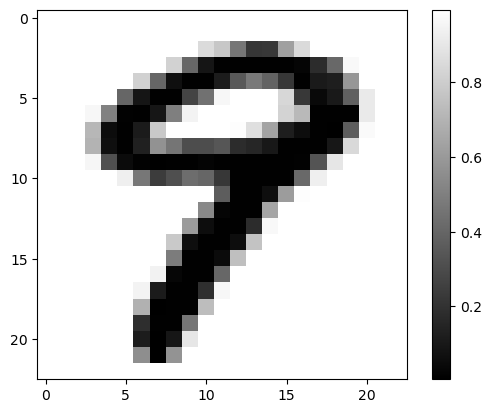

In [35]:
X = np.array(df)
ShowMe(X)

1.3. Visualize the reduced dimensional input by PCA

In [55]:
# Define a function that returns reduced dimensional input.
def reducedInputPCA(X,nP):
    pca = PCA(n_components = nPC)       # Define a PCA␣object for a given number of target PCs.
    X_pca = pca.fit_transform(X)        # Get the␣transformed scores.
    return pca.inverse_transform(X_pca) # Bring back the␣transformed scores to the original coordinate system.:

In [67]:
# Determine the number of features
n_features = X.shape[1]
print(f"Number of features: {n_features}")

Number of features: 10


N# of PCs = 10


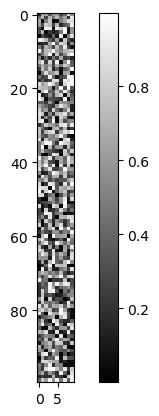

N# of PCs = 10


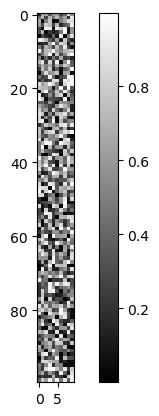

N# of PCs = 5


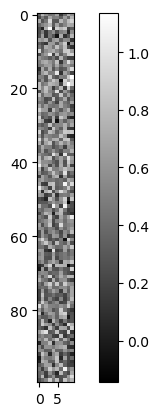

N# of PCs = 3


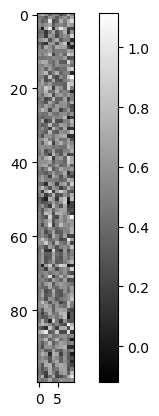

N# of PCs = 1


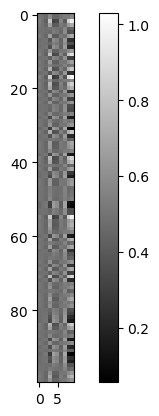

In [69]:
# Visualize the reduced dimensional input for different cases.
# As we shrink the dimension, the image gets less clear.
#n_features = X.shape[1]
for nPC in [min(23, n_features), min(10, n_features), min(5, n_features), min(3, n_features), min(1, n_features)]:
#for nPC in [23, 10, 5, 3, 1]:
    Z = reducedInputPCA(X,nPC)
    print(f"N# of PCs = {nPC}")
    ShowMe(Z)

1.4. Analysis of the cumulative variance ratio (CVR):

In [73]:
# Separate PCA model fitting (if needed)
# Ensure n_components does not exceed the number of features
n_features = X.shape[1]
n_components_to_fit = min(23, n_features)  # Adjust to fit within the range
pca = PCA(n_components=n_components_to_fit)
pca.fit(X)  # Train the model with the data

PCA(n_components=10)

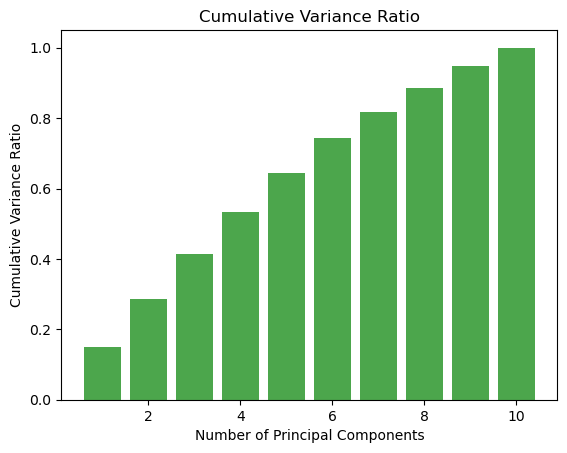

In [74]:
 # Visualize the CVRs as a Barplot.
CVRs = np.cumsum(pca.explained_variance_ratio_) # Calculate the CVRs.
nPCs = np.arange(1, len(CVRs) + 1) # Define an array that␣corresponds to the number of PCs.
plt.bar(nPCs,CVRs,color = 'green', alpha=0.7)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Ratio')
plt.show()

0.1.2 2. Dimensional reduction with NMF:

NMF (Non-negative Matrix Factorization) is applicable for data matrix that contains only nonnegative values. Similar to PCA, we can do dimensional reduction and obtain reduced dimensional
input using NMF. We notice that we get a bit less ‘noisy’ images compared to the result of PCA.
More information at Wikipedia.


2.1. Visualize the reduced dimensional input by NMF:

In [75]:
 # Define a function that returns reduced dimensional input.
def reducedInputNMF(X,n):
    nmf = NMF(n_components=n, init='random', random_state=0) # Define a␣NMF object for a given number of target components.
    X_nmf = nmf.fit_transform(X) # Get the␣transformed scores.
    return nmf.inverse_transform(X_nmf) # Bring back␣the transformed scores to the original coordinate system.


N# of Components = 23


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


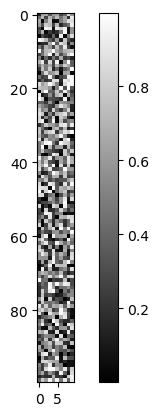

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


N# of Components = 10


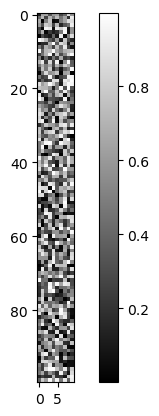

N# of Components = 5


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


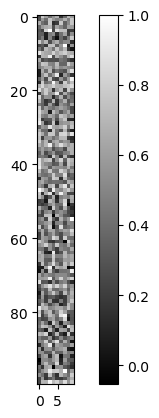

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


N# of Components = 3


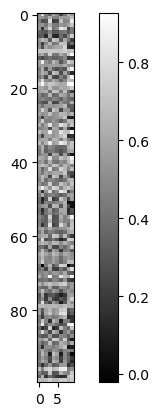

N# of Components = 1


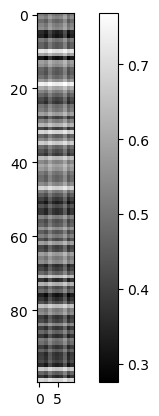

In [76]:
# Visualize the reduced dimensional input for different cases.
# As we shrink the dimension, the image gets less clear.
for n in [23, 10, 5, 3, 1]:
    Z = reducedInputNMF(X,n)
    print( "N# of Components = " + str(n))
    ShowMe(Z)



0.1.3 3. Optimized high dimensional visualiztion with PCA:

3.1. Simulate data:

In [77]:
 # 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 5,random_state=123)
X.shape

(150, 8)

In [78]:
# Define a custom color palette.
myColors = {0:'red',1:'green',2:'blue'}
labelColors = pd.Series(label).apply(lambda x: myColors[x])

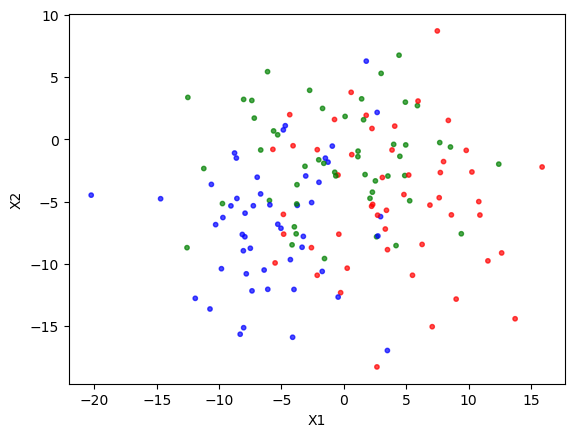

In [79]:
# Visualize on the X1 vs X2 plane. X1 ==> column 0, X2 ==> column 1.
# We can hardly tell the clusters apart!
# The clusters largely overlap.
plt.scatter(X[:,0],X[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

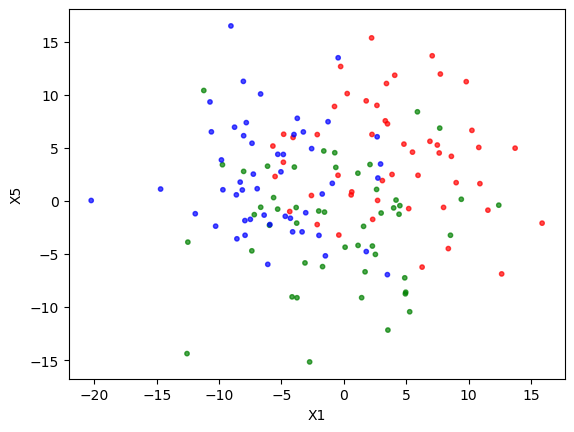

In [80]:
# Visualize on the X1 vs X5 plane. X1 ==> column 0, X5 ==> column 4.
# We can hardly tell the clusters apart!
# The clusters largely overlap.
plt.scatter(X[:,0],X[:,4],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X5")
plt.show()

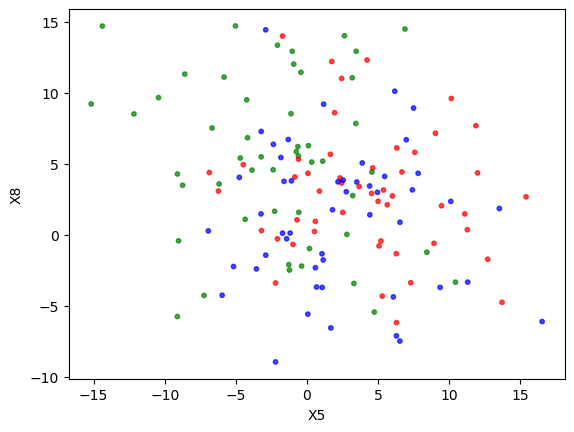

In [81]:
# Visualize on the X5 vs X8 plane. X5 ==> column 4, X8 ==> column 7.
# We can hardly tell the clusters apart!
# The clusters largely overlap.
plt.scatter(X[:,4],X[:,7],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X5")
plt.ylabel("X8")
plt.show()


3.2. Visualize on the plane defined by PC1 and PC2:

In [85]:
 # Only 2 first PCs are needed.
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

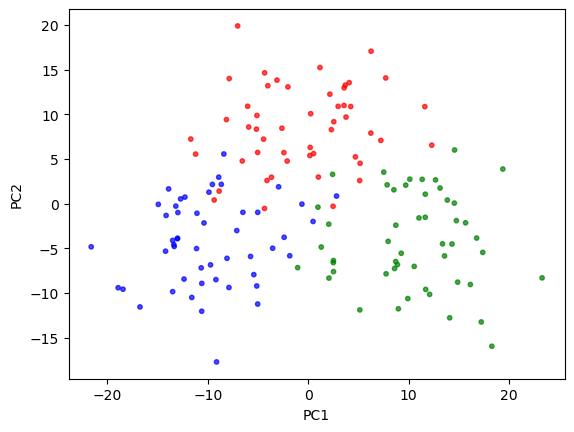

In [83]:
# Visualize on the PC1 vs PC2 plane.
# The clusters overlap the least!
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
